<font size = 5 face = bold>__DS223 - Marketing Analytics__

<font size = 5 face = bold>__Homework 4: Social Network Analysis__

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import random
from operator import itemgetter
import matplotlib.pyplot as plt
from heapq import nlargest, nsmallest
import matplotlib.colors as colors
import matplotlib.colors as colors
import igraph as ig

In [3]:
# Task 1a: Create a Directed Graph
graph = nx.DiGraph()

# Load data from connections.txt
with open('connections.txt', 'r') as file:
    for line in file:
        node1, node2 = map(int, line.strip().split())
        graph.add_edge(node1, node2)

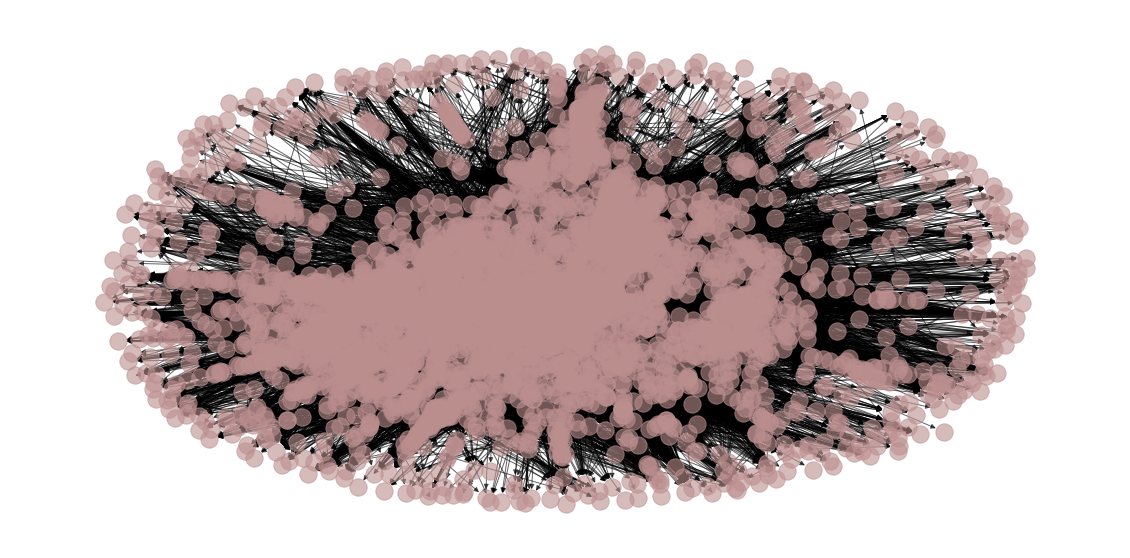

In [4]:
# Task 1b: Visualization
pos = nx.spring_layout(graph)
fig, ax = plt.subplots(figsize = (20,10))
nx.draw(graph, pos, with_labels = False, ax = ax, alpha = 0.6, node_color = 'rosybrown')
plt.show()

In [8]:
def find_bridges(graph):
    bridges = []
    visited = set()
    disc = {}  # Discovery times of vertices
    low = {}   # Earliest visited vertex reachable from the subtree rooted at that vertex

    time = 0  # Current time

    def dfs(u, parent):
        nonlocal time
        disc[u] = time
        low[u] = time
        time += 1

        visited.add(u)

        for v in graph.neighbors(u):
            if v not in visited:
                dfs(v, u)
                low[u] = min(low[u], low[v])

                if low[v] > disc[u]:
                    bridges.append((u, v))
            elif v != parent:
                low[u] = min(low[u], disc[v])

    for node in graph.nodes():
        if node not in visited:
            dfs(node, None)

    return bridges


# Task 2: Show which nodes are bridges
bridges = find_bridges(graph)
print("Bridges:", bridges)

Bridges: [(323, 332), (323, 341), (322, 323), (322, 329), (339, 340), (339, 347), (322, 339), (322, 342), (322, 345), (290, 322), (280, 290), (280, 291), (280, 297), (308, 338), (280, 304), (277, 280), (277, 285), (277, 294), (311, 344), (277, 311), (168, 277), (158, 168), (320, 346), (271, 298), (239, 295), (158, 232), (158, 242), (158, 248), (158, 317), (142, 158), (222, 240), (203, 270), (142, 161), (142, 169), (142, 170), (123, 142), (122, 123), (557, 570), (555, 557), (553, 555), (561, 565), (679, 682), (678, 679), (678, 685), (639, 678), (637, 639), (651, 683), (1888, 1891), (1902, 1911), (1898, 1902), (1888, 1898), (1879, 1888), (1864, 1879), (1845, 1864), (1843, 1845), (1842, 1843), (1842, 1849), (1842, 1861), (1868, 1900), (1842, 1868), (1839, 1842), (1839, 1886), (1839, 1909), (1826, 1839), (1816, 1826), (1835, 1851), (1881, 1882), (1897, 1910), (1885, 1897), (1881, 1885), (1867, 1881), (1835, 1883), (1816, 1827), (1810, 1816), (1810, 1823), (1809, 1810), (1809, 1813), (1809,

In [9]:
# Task 3: Show the density of the graph
density = nx.density(graph)
print("Graph Density:", density)

Graph Density: 0.0054099817517196435


In [10]:
# Task 4: Show nodes with the highest and lowest degree
degree_dict = dict(graph.degree())
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

print("Nodes with the highest degree:")
print(sorted_degree[:5])  # Display top 5 nodes with the highest degree

print("\nNodes with the lowest degree:")
print(sorted_degree[-5:])  # Display bottom 5 nodes with the lowest degree


Nodes with the highest degree:
[(107, 1045), (1684, 792), (1912, 755), (3437, 547), (0, 347)]

Nodes with the lowest degree:
[(4010, 1), (4015, 1), (4022, 1), (4024, 1), (4035, 1)]


In [11]:
# Task 5: Show nodes with the highest incoming and outgoing connections
in_degree_dict = dict(graph.in_degree())
out_degree_dict = dict(graph.out_degree())

sorted_in_degree = sorted(in_degree_dict.items(), key=lambda x: x[1], reverse=True)
sorted_out_degree = sorted(out_degree_dict.items(), key=lambda x: x[1], reverse=True)

print("Nodes with the highest in-degree:")
print(sorted_in_degree[:5])  # Display top 5 nodes with the highest in-degree

print("\nNodes with the highest out-degree:")
print(sorted_out_degree[:5])  # Display top 5 nodes with the highest out-degree


Nodes with the highest in-degree:
[(1888, 251), (2543, 246), (1800, 216), (2611, 197), (1827, 186)]

Nodes with the highest out-degree:
[(107, 1043), (1684, 778), (1912, 748), (3437, 542), (0, 347)]


In [13]:
# Task 6a: Show nodes with the highest closeness, betweenness, and eigenvector centrality
closeness_dict = nx.closeness_centrality(graph)
betweenness_dict = nx.betweenness_centrality(graph)
eigenvector_dict = nx.eigenvector_centrality(graph, max_iter = 500)

sorted_closeness = sorted(closeness_dict.items(), key=lambda x: x[1], reverse=True)
sorted_betweenness = sorted(betweenness_dict.items(), key=lambda x: x[1], reverse=True)
sorted_eigenvector = sorted(eigenvector_dict.items(), key=lambda x: x[1], reverse=True)

print("Nodes with the highest closeness centrality:")
print(sorted_closeness[:5])  # Display top 5 nodes with the highest closeness centrality

print("\nNodes with the highest betweenness centrality:")
print(sorted_betweenness[:5])  # Display top 5 nodes with the highest betweenness centrality

print("\nNodes with the highest eigenvector centrality:")
print(sorted_eigenvector[:5])  # Display top 5 nodes with the highest eigenvector centrality


Nodes with the highest closeness centrality:
[(2642, 0.11797503012816456), (2649, 0.11793232689533308), (2629, 0.11629338421878259), (2643, 0.11591804904451317), (2543, 0.11590243183892303)]

Nodes with the highest betweenness centrality:
[(1684, 0.03299985344063623), (1912, 0.027145672353148857), (1718, 0.026577614223444346), (563, 0.01300961569074186), (1405, 0.010123670299605515)]

Nodes with the highest eigenvector centrality:
[(2655, 0.802704299670652), (2654, 0.47986846225069085), (2646, 0.22755258082041144), (2638, 0.17819686548554586), (2631, 0.1669318256988354)]


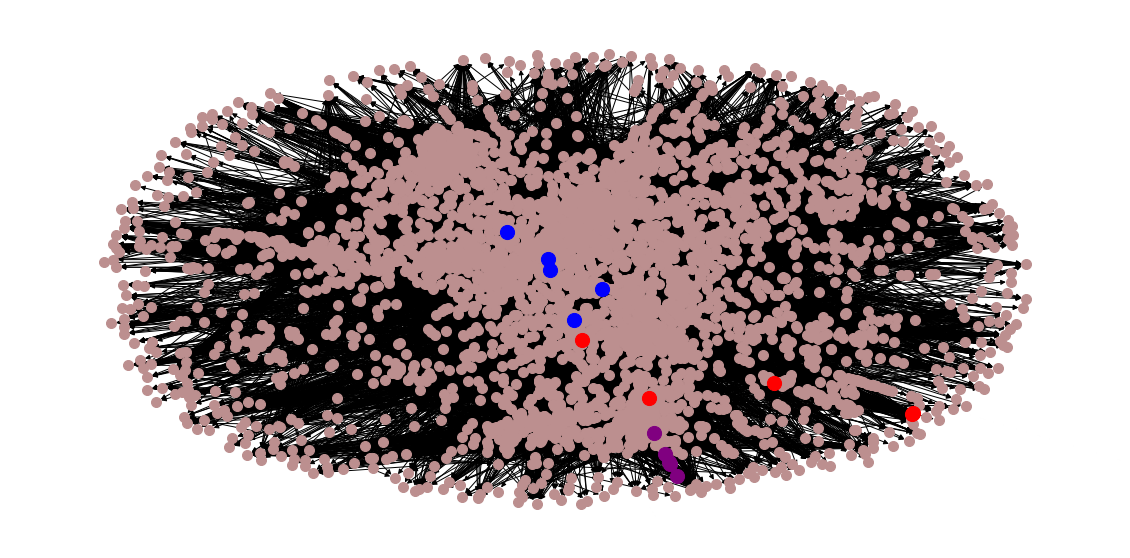

In [15]:
# Task 6b: Visualization with highlighted nodes

pos = nx.spring_layout(graph)
fig, ax = plt.subplots(figsize = (20,10))

# Draw the graph with rosybrown color for nodes
nx.draw(graph, pos, with_labels = False, node_color = 'rosybrown', 
        alpha = 0.6, node_size = 100, ax = ax)

# Highlight nodes with the highest centrality in red
top_nodes_closeness = [node for node, _ in sorted_closeness[:5]]
nx.draw_networkx_nodes(graph, pos, nodelist = top_nodes_closeness, alpha = 0.6,
                       node_color = 'sienna', node_size = 200, ax = ax)

top_nodes_betweenness = [node for node, _ in sorted_betweenness[:5]]
nx.draw_networkx_nodes(graph, pos, nodelist = top_nodes_betweenness, alpha = 0.6, 
                       node_color = 'cadetblue', node_size = 200, ax = ax)

top_nodes_eigenvector = [node for node, _ in sorted_eigenvector[:5]]
nx.draw_networkx_nodes(graph, pos, nodelist = top_nodes_eigenvector, alpha = 0.6, 
                       node_color = 'olive', node_size = 200, ax = ax)

plt.show()


In [32]:
# Task 7: Implement a community detection algorithm on the directed graph

# Convert the directed graph to an igraph graph
ig_graph = ig.Graph.TupleList(graph.edges(), directed=True)

# Run Walktrap Community Detection algorithm
walktrap_result = ig_graph.community_walktrap()

# Convert the result to a list of communities
communities = [set(community) for community in walktrap_result.as_clustering()]

# Show the number of communities
num_communities = len(communities)
print(f"Number of communities: {num_communities}")

Number of communities: 77


In [33]:
# Task 8: Find the largest and smallest communities
community_sizes = [(i, len(community)) for i, community in enumerate(communities)]
largest_community = max(community_sizes, key=lambda x: x[1])
smallest_community = min(community_sizes, key=lambda x: x[1])

print(f"Largest community (Community {largest_community[0]}): {largest_community[1]} nodes")
print(f"Smallest community (Community {smallest_community[0]}): {smallest_community[1]} nodes")

Largest community (Community 19): 481 nodes
Smallest community (Community 6): 2 nodes


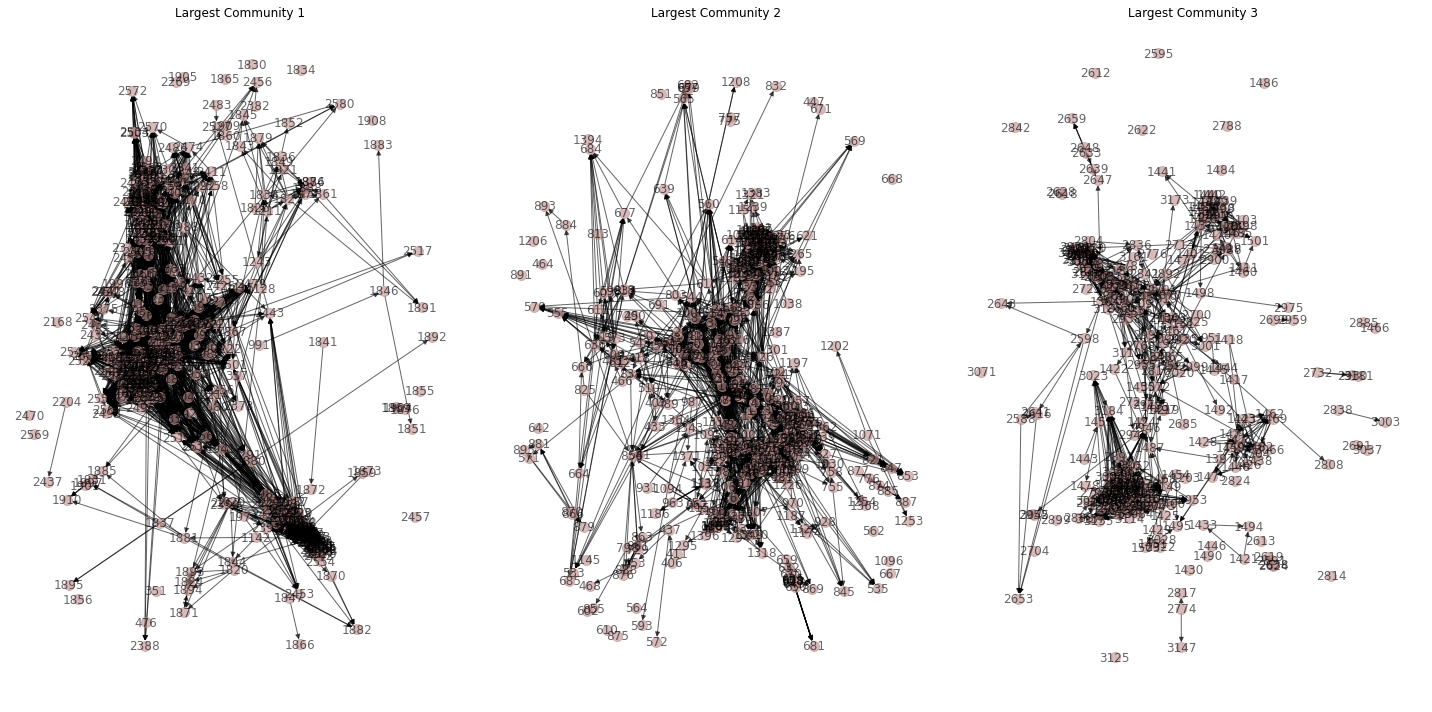

In [39]:
# Task 9: Select the largest three communities and draw them.

# Select the largest three communities
largest_three_communities = sorted(communities, key=len, reverse=True)[:3]

# Visualization of the largest three communities
pos = nx.spring_layout(graph)
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

for i, community in enumerate(largest_three_communities):
    nx.draw(graph.subgraph(community), pos, with_labels=True, alpha=0.6, 
            node_color='rosybrown', node_size=100, ax=axes[i])
    axes[i].set_title(f"Largest Community {i + 1}")

plt.tight_layout()
plt.show()
